# Python Data Analysis for Spotify 2023 Most Streamed Songs - Alp Isbir DS 220

**Questions and Clause:** As someone who enjoys music very much and wants to have a music career in the future, understanding certain elements of the most streamed songs is a great way for me to develop my creative outlook. For this cause, I downloaded the dataset "Most Streamed Spotify Songs 2023". Here are some questions I will seek to answer using this data:
1) Danceability and energy are important factors that determine when a song is played. How do songs with danceability and energy below 50% compare in streams to songs with danceability and energy above 50%?
2) Artists have their own style, typically characterized by their BPM (beats per minute) choices in their songs. Which BPM ranges are most added to playlists?
3) Songs released late into 2023 should have a "disadvantage" when it comes to gathering streams during 2023 when compared to songs early into 2023. Because the data extracted in this dataset is until July, there are 7 months worth of data in this dataset. For this reason let's say songs released after 1st of April are considered late; what is the percentage of the top 300 songs that are released late in comparison to all of the top 300 songs in 2023?
4) The mode of a song (major or minor) usually affect how we respond to different emotions in a song, with minor being more sad and major being more happy. How do the medians of percieved valence (positivity of the songs' musical content) compare between minor vs major songs?
5) The key of a song helps determine the mood of a song, which in turn may help a song get more streams as some moods are more approachable and mainstream. From highest to lowest, what are the keys used by the top 20 artists with most songs in the top 1000 list?
6) Songs with high amounts of lyrics and vocals are usually more popular because listeners can sing along to the songs, which can affect a songs ranking in music charts. How do songs that have hit top 10 in charts of any of the three big streaming services compare in speechability to songs that have not hit any charts in any of the streaming services (chart value is 0)?

**Cleaning:** The dataset I have chosen has already been cleaned (has headers in the first row and data is seperated by commas), so there is no need to further clean. However, as I was reading about the dataset from the website, I found that people commented on one specific row being corrupted. This row shows all of the feature names in its streams column instead of the stream number itself (value: **BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3**). I will drop this row after creating the database in python.
I also found that numeric values in some columns are represented with a comma if they are bigger than 999, so I will get rid of any commas I see in those columns.


 Moving on with the imports and reading the file itself:

In [1]:
import numpy as np
import pandas as pd
import datetime

In [13]:
df = pd.read_csv('spotify-2023.csv')

When I run this code, I get a UnicodeDecodeError. After doing some research, I understood that this is because my csv file is not actually in UTF-8 encoding, which is the default encoding parameter in the pd.read_csv() method. Luckily, I found the correct encoding type for this dataset on the website I downloaded the dataset. I change the encoding type to 'iso-8859-1' to fix this error:

In [2]:
df = pd.read_csv('spotify-2023.csv', encoding = 'iso-8859-1')

**Cleaning:** Time to drop the row I mentioned above:

In [3]:
rowIndex = df[df['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'].index
print(rowIndex)
df = df.drop(rowIndex)

Index([574], dtype='int64')


**Cleaning:** Let us also check for any duplicates:

In [4]:
df.duplicated().sum()

0

We have no duplicates, so we can continue!

**Visualization:** Before moving on with my prompts, I want to get a better understanding of the database I am dealing with. I will use the info() method to get a basic understanding of the number of columns and rows, as well as the names and data types of each column.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    object
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    object
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    object
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    object


**Analysis of dataset from Visualization:** From this output, I understand that my dataset has 24 different columns (0 to 23), 952 rows (0 to 951) and two datatypes, int64 (64 bit integer), and object (meaning string in Pandas). Also, I understand that only two column types have some null entries because the other entries have a non-null count of 953, equal to the amount of rows. 

The first column with null entries is the '_in_shazam_charts' column. At first, I thought the 'in_shazam_charts' column may be null because either **1)** the song is not on shazam, or **2)** because the song did not collect enough shazam listening to enter the charts. However, after looking at the website I downloaded the dataset, I learned that songs with not enough listening to enter charts have a number '0' in that column. Therefore, I concluded that the songs are not available on shazam, which is why I will omit using that column when calculating streams and charts because songs without an entry will be disadvantaged because they are not available there.

The second column with null entries is the 'key' column. Key refers to the scale, or the group of pitches, that a song is based on. It is possible for songs to not have a key in the sense that they have so much going on that it is hard to name one dominant key. Another possible explanation is that the songs are percussion based, but that is unlikely because those songs are not mainstream and will most likely not make it into the most streamed songs on any platform. The last possible explanation is that a song has a key, but the software used in this dataset for determening the key was unable to detect it. Sadly, I was not able to find any explanation for this on the website. Either way, this will not be a problem as my queries will not use the key of a song to determine something else, so there will be no disadvantage.

Finally, I have to keep in mind that some columns that would intuitively be an integer are objects. For example, 'in_apple_playlists' is an int, while' in_deezer_playlists' is an object. This is most likely due to bad practice by the creator of the set.

With this information in mind, I can move onto my queries.


**QUERY #1**

In [6]:
above50 = df[(df['danceability_%'] > 50) & (df['energy_%'] > 50)]
below50 = df[(df['danceability_%'] < 50) & (df['energy_%'] < 50)]
meanStreamsAbove50 = above50['streams'].astype(int).mean()
meanStreamsBelow50 = below50['streams'].astype(int).mean()
if (meanStreamsAbove50 > meanStreamsBelow50):
    difference = meanStreamsAbove50 - meanStreamsBelow50
else:
    difference = meanStreamsBelow50 - meanStreamsAbove50
print('Mean streaming count for songs with danceability and energy percentage above 50: ' + str(int(meanStreamsAbove50)) +   '\nMean streaming count for songs with danceability and energy percentage below 50: '+ str(int(meanStreamsBelow50)) + "\nDifference in streams: " + str(int(difference)))

Mean streaming count for songs with danceability and energy percentage above 50: 498544485
Mean streaming count for songs with danceability and energy percentage below 50: 579902951
Difference in streams: 81358465


**QUERY #2**

**Cleaning:** The values of the 'in_deezer_playlists' columns are written in strings. While I can evaluate the value as an integer using the astype(int) method, the strings contain commas for numbers bigger than 999, so I will first write a code that gets rid of all commas in all values of the 'in_deezer_playlists' column. Here is the code:

In [7]:
df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',','') 
print (df['in_deezer_playlists'].head(100))


0       45
1       58
2       91
3      125
4       87
      ... 
95      69
96      63
97      42
98    1632
99      25
Name: in_deezer_playlists, Length: 100, dtype: object


As we can see, for example, the 98th column, which used to be "1,632", is now "1632". We can move on with our second query:

In [8]:
minimumBPM = df['bpm'].min()
maximumBPM = df['bpm'].max()
difference = maximumBPM - minimumBPM
interval = difference//4 # I want five BPM groups in total.
currentBPM = minimumBPM
playlistDictionary = {} # I will represent the BPM - playlist pair as a dictionary.
while (currentBPM < maximumBPM):
    range = df[(df['bpm'] >= currentBPM) & (df['bpm'] <= currentBPM + interval)] # Select all df rows with BPM in specified range.
    playlistDictionary[ str(currentBPM) + ' to ' + str(currentBPM + interval)] = range['in_spotify_playlists'].astype(int).sum() + range['in_apple_playlists'].astype(int).sum() + range['in_deezer_playlists'].astype(int).sum()
    currentBPM += interval
print (playlistDictionary)


{'65 to 100': 1424012, '100 to 135': 2507673, '135 to 170': 1073585, '170 to 205': 527730, '205 to 240': 11695}


**QUERY #3**

**Sorting:** One of the actions I have to do for this query is to sort the database according to streams, because I will look for the top 300 songs according to their streams. I wanted to include this code outside of the query because it is more of a general action. Here is the code for sorting this database according to streams:

In [10]:
df = df.sort_values(by="streams", key = lambda x: x.astype(int), ascending = False) # I use an inline operation to change the string value into an integer before sorting it,
                                                                                    # because streams is originally a string value in the database.
print(df)

                                        track_name  \
55                                 Blinding Lights   
179                                   Shape of You   
86                               Someone You Loved   
620                                   Dance Monkey   
41   Sunflower - Spider-Man: Into the Spider-Verse   
..                                             ...   
68                                       Overdrive   
142                    Gol Bolinha, Gol Quadrado 2   
144                                          QUEMA   
393                              Jhoome Jo Pathaan   
123                                    Que Vuelvas   

                                        artist(s)_name  artist_count  \
55                                          The Weeknd             1   
179                                         Ed Sheeran             1   
86                                       Lewis Capaldi             1   
620                                        Tones and I         

We also need to check if there are at least 300 songs released in 2023 that are in the top 1000 charts. Here is the code:

In [11]:
songCount2023 = len(df[df['released_year'] == 2023])
print(songCount2023)

175


Unfortunately, we learn that there are only 175 songs released in 2023 inside the top songs database. I adjust the query to include the top 150 songs instead of the initial 300. Here is the **query** with the correct adjustments made:

In [12]:
top150 = df[df['released_year'] == 2023].head(150)
lateSongs = top150[top150['released_month'] >= 4]
normalSongs = top150[top150['released_month'] < 4]
totalSongCount = len(lateSongs) + len(normalSongs)
percentage = len(lateSongs) / totalSongCount * 100
print('Percentage of songs released after 1st of July versus all songs released in 2023: '+ str(percentage) + '%')

Percentage of songs released after 1st of July versus all songs released in 2023: 48.66666666666667%


**QUERY #4**

In [13]:
minorSongs = df[df['mode'] == 'Minor']
majorSongs = df[df['mode'] == 'Major']
medianMinor = minorSongs['valence_%'].median()
medianMajor = majorSongs['valence_%'].median()
print('Median valence percentage of minor songs: ' + str(medianMinor) + '\nMedian valence percentage of major songs: ' +str(medianMajor))


Median valence percentage of minor songs: 40.0
Median valence percentage of major songs: 56.0


**QUERY #5:**

In this query, I would like to plot the data I get because I am assuming I will get at least a few dictionary key-value pairs (total possible number of keys in music are quite large). To plot data, I first import the plotting API matplotlib:

In [14]:
import matplotlib.pyplot as plt

Moving on with the query and plotting:

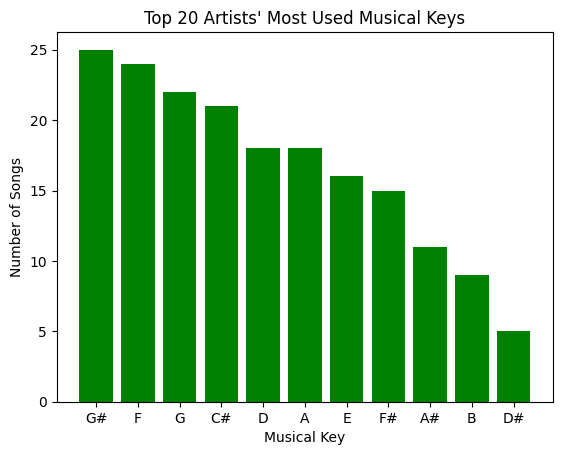

In [16]:
top20Artists = df['artist(s)_name'].value_counts().head(20).index # I get the names of the top 20 artists.
keyDictionary = {}
sortedDictionary = {}
for artist in top20Artists:
    songs = df[df['artist(s)_name'] == artist]
    keyCount = songs['key'].value_counts()
    for key in keyCount.index: # get each key's name in keyCount
        if key in keyDictionary:
            keyDictionary[key] += keyCount[key]
        else:
            keyDictionary[key] = keyCount[key]

sortedList = sorted(keyDictionary.items(), key= lambda key: key[1], reverse=True) # Here, I first sort the dictionary according to the values inside the dictionary, 
                                                                                           # using .items() to evaluate the dictionary as an array with index 0 as key and index 1
                                                                                           # as value, then an inline function to specify that sorted() function should use index 1.
                                                                                           # Finally, I use reverse=True to reverse list and return a list with key-value pairs.

sortedDictionary = dict(sortedList) # Here, I convert the list back to a dictionary because I will create my plot by extracting the keys and values from the dictionary.
keyArray = sortedDictionary.keys()
valueArray = list(sortedDictionary.values())
plt.bar(keyArray, valueArray, color='green')
plt.xlabel('Musical Key')
plt.ylabel('Number of Songs')
plt.title('Top 20 Artists\' Most Used Musical Keys')
plt.show()


**QUERY #6:**

Before doing our analysis, I want to understand and confirm what these chart values mean, because the recorded charts could be top 50, top 100, top 200, or something else. Values in the 'in_shazam_charts' column are alarmingly higher when compared to Spotify, Deezer and Apple Music charts, so I will exclude the shazam charts in this query. Let us see the maximum values in the Spotify, Deezer and Apple Music chart columns take, and also confirm that the minimum values in all of them are equal to 0 (song is not in the charts):

In [17]:
highestSpotify = df['in_spotify_charts'].max()
highestApple = df['in_apple_charts'].max()
highestDeezer = df['in_deezer_charts'].max()
lowestSpotify = df['in_spotify_charts'].min()
lowestApple = df['in_apple_charts'].min()
lowestDeezer = df['in_deezer_charts'].min()
print(highestSpotify, highestApple, highestDeezer, lowestSpotify, lowestApple, lowestDeezer)

147 275 58 0 0 0


From these values, we understand that indeed all columns have a minimum value of 0, meaning they did not make it into the charts. I will also make the assumption that Spotify charts are ranked out of 150, Apple charts are ranked out of 300, and Deezer Charts are ranked out of 100, because charts usually are ranked in this sort of manner. If this is true, the reason the maximum values do not hit 150, 300, or 100 is most likely because these values represent the best these songs have come for an extended period of time, which is why we see multiple 1's (top charting song). Several songs could have charted at the top during different times. Because all charts are ranked out of different numbers, instead of the original prompt of top 10 charting songs, I will **change my query to compare the top 2% in the charts.** This way, the charts ranked out of higher values, such as Apple Music and Spotify, are not at a disadvantage when it comes to the Deezer chart, which is ranked out of 100. Even though this is not the perfect approach, this is the best approach I could come up with the data available to me, and it is more fair than the original prompt because even though there are more songs in the top 300 or top 150 charts when compared to the top 100 chart, those songs had to "work harder" (compete with more songs) to get there. Moving on with the query:

In [18]:
top2PercentSpotify = df[(df['in_spotify_charts'] <= 3) & (df['in_spotify_charts'] != 0)]
top2PercentApple = df[(df['in_apple_charts'] <= 6) & (df['in_apple_charts'] != 0)]
top2PercentDeezer = df[(df['in_deezer_charts'] <= 2) & (df['in_deezer_charts'] != 0)]
concatenatedTop2Percent = pd.concat([top2PercentSpotify, top2PercentApple, top2PercentDeezer]).drop_duplicates() # I make a dataframe object that is made from the concatenation of all top 10 percent songs,
                                                                                                                     # then use drop_duplicates() method to drop any possible duplicate rows.
notInCharts = df[(df['in_spotify_charts'] == 0) & (df['in_apple_charts'] == 0) & (df['in_deezer_charts'] == 0)]      
averageSpeech2Percent = concatenatedTop2Percent['speechiness_%'].mean()
averageSpeechNotInCharts = notInCharts['speechiness_%'].mean()
print('Mean speechiness percentage of songs that made it into top 2 percent of charts: ' + str(averageSpeech2Percent) + '\nMean speechiness percentage of songs that made it into no charts: ' +str(averageSpeechNotInCharts))



Mean speechiness percentage of songs that made it into top 2 percent of charts: 33.62797619047619
Mean speechiness percentage of songs that made it into no charts: 14.40625


**ANALYSIS OF QUERIES:** My main hope with the queries were to uncover certain patterns that could benefit potential artists in the future. Here are some information I've found:

**Question 1:** How do songs with danceability and energy below 50% compare in streams to songs with danceability and energy above 50%?
    
**Answer 1:** Mean streams for songs with danceability and energy below 50% were considerably lower (eight figures difference) for songs with danceability and energy above 50%. Unlike my expectation, where I thought danceable songs would be more favorable, lower energy songs were actually more favorable. These songs could be from genres like slow rock or sad pop. This also makes sense because these slower/sadder genres were popular with mainstream media these days, appealing to a younger audience.

**Question 2:** Which BPM ranges are most added to playlists?

**Answer 2:** By far, BPM ranges 100-135 were most likely to be added to playlists. This BPM range is the range where most pop, dance, house, garage, and other very popular electronic music genres sit at. Since festivals and DJ-performances are getting increasingly popular among people (with the rising popularity of events like Boiler Room, for example), it makes sense that playlists consist of these types of songs.

**Question 3:** what is the percentage of the top 300 songs that are released late (after April 1st) in comparison to all of the top 300 songs in 2023?

**Answer 3:** Percentage of songs released late into the year when compared to early in the year were mostly same, around 48%. From this, I understand that 2023 was a steady year for music, where music released at any times were possibly becoming hit songs. 

**Question 4:** How do the medians of percieved valence (positivity of the songs' musical content) compare between minor vs major songs?

**Answer 4:** Median valence of minor songs were considerably lower (40 %) when compared to major songs (56 %). This makes sense as major chords and major intervals have a happier tone when compared to minor songs, so minor songs make better bases for low valence songs, while major songs make better bases for high valence songs.

**Question 5:** From highest to lowest, what are the keys used by the top 20 artists with most songs in the top 1000 list?

**Answer 5:** The top 3 most successful keys were G#, F, G, and top 3 least successful keys were A#, B, and D#. These keys can be commonly seen in Jazz/Blues, Rock, Pop, and world music. This makes sense because all of these genres are very universal as opposed to engaging with a specific audience. The keys A#, B, and D# are popular among Classical, Folk, and Country music. Again, this makes sense because these genres appeal to a very specific audience that is not very prevalent in the music industry at the moment (younger generations tend to not prefer classical music, folk music is not very common among urban/contemporary places, and country is very limited to the USA).

**Question 6:** How do songs that have hit top 10 in charts of any of the three big streaming services compare in speechability to songs that have not hit any charts in any of the streaming services (chart value is 0)?

**Answer 6:** Mean speechiness of songs that made it into top 2 percent of charts were more than double (33 %) than songs that made it into no charts (14%). This makes sense because songs with lyrics are much more likely to be catchy and hit the charts whem compared to songs with lesser lyrics.

# Story To Derive



At the end of my 6 queries on the Spotify 2023 Most Streamed Songs Charts database, I now have a logical understanding of some key ideas it takes for musicians and artists to rise up in the music world of today. irst off, Arists should release **emotional/sad songs** instead of **uptempo songs** if they want to gather **as many stream**s as possible because their audience would be wider in 2023. Either way, they should write their songs in **minor key** if it is going to be **emotional/sad,** and in **major key** if they want to give off a **happy and more uptempo energy**. If artists are looking to have a presence in **as many playlists**, and possibly have more social media appeareance/popularity, they should favor a **BPM range of 100-135 electronic music**. If looking for **success**, these artists should use **keys such as G#, F, and G,** because they pertain to popular and timeless genres. Luckily, artists do not have to worry about releasing songs as early into the year as possible, because **there is no major difference in late songs' rankings when compared to early songs.** Finally, artists should definitely incorporate **catchy lyricism** because it will help them get a **better placement in the charts** of all three popular music streaming platforms.